This exercise will require you to pull some data from the Qunadl API. Qaundl is currently the most widely used aggregator of financial market data.

As a first step, you will need to register a free account on the http://www.quandl.com website.

After you register, you will be provided with a unique API key, that you should store:

In [1]:
# Store the API key as a string - according to PEP8, constants are always named in all upper case
API_KEY = 'sNNRSifvagLw6QX8Px69'
#API_KEY =API_KEY.upper()
print(API_KEY)

sNNRSifvagLw6QX8Px69


Qaundl has a large number of data sources, but, unfortunately, most of them require a Premium subscription. Still, there are also a good number of free datasets.

For this mini project, we will focus on equities data from the Frankfurt Stock Exhange (FSE), which is available for free. We'll try and analyze the stock prices of a company called Carl Zeiss Meditec, which manufactures tools for eye examinations, as well as medical lasers for laser eye surgery: https://www.zeiss.com/meditec/int/home.html. The company is listed under the stock ticker AFX_X.

You can find the detailed Quandl API instructions here: https://docs.quandl.com/docs/time-series

While there is a dedicated Python package for connecting to the Quandl API, we would prefer that you use the *requests* package, which can be easily downloaded using *pip* or *conda*. You can find the documentation for the package here: http://docs.python-requests.org/en/master/ 

Finally, apart from the *requests* package, you are encouraged to not use any third party Python packages, such as *pandas*, and instead focus on what's available in the Python Standard Library (the *collections* module might come in handy: https://pymotw.com/3/collections/).
Also, since you won't have access to DataFrames, you are encouraged to us Python's native data structures - preferably dictionaries, though some questions can also be answered using lists.
You can read more on these data structures here: https://docs.python.org/3/tutorial/datastructures.html

Keep in mind that the JSON responses you will be getting from the API map almost one-to-one to Python's dictionaries. Unfortunately, they can be very nested, so make sure you read up on indexing dictionaries in the documentation provided above.

In [15]:
# First, import the relevant modules
%matplotlib inline

import requests
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
# Now, call the Quandl API and pull out a small sample of the data (only one day) to get a glimpse
# into the JSON structure that will be returned

#url = "https://www.quandl.com/api/v3/datasets/WIKI/FB/data.json?api_key="+API_KEY
url = "https://www.quandl.com/api/v3/datasets/FSE/AFX_X.json?start_date=2017-01-01&end_date=2017-12-31&api_key=sNNRSifvagLw6QX8Px69"
print(url)
r = requests.get(url)
#print(type(r))

https://www.quandl.com/api/v3/datasets/FSE/AFX_X.json?start_date=2017-01-01&end_date=2017-12-31&api_key=sNNRSifvagLw6QX8Px69


In [4]:
# Inspect the JSON structure of the object you created, and take note of how nested it is,
# as well as the overall structure
j = r.json()

# Structure
{u'dataset': 
 {u'dataset_code': u'AFX_X', 
  u'column_names': [u'Date', u'Open', u'High', u'Low', u'Close', u'Change', u'Traded Volume', u'Turnover', u'Last Price of the Day', u'Daily Traded Units', u'Daily Turnover'], 
  u'newest_available_date': u'2019-03-01', 
  u'description': u'Stock Prices for Carl Zeiss Meditec (AFX) from the Frankfurt Stock Exchange.<br><br>Trading System: Xetra<br><br>ISIN: DE0005313704', 
  u'end_date': u'2014-01-10', 
  u'data': [[u'2014-01-10', 23.31, 23.31, 22.92, 22.99, None, 90100.0, 2075460.0, None, None, None], [u'2014-01-09', 23.1, 23.44, 23.05, 23.44, None, 55237.0, 1285266.0, None, None, None], [u'2014-01-08', 22.92, 23.32, 22.75, 23.0, None, 118068.0, 2719474.0, None, None, None], [u'2014-01-07', 24.3, 24.31, 22.63, 22.8, None, 212702.0, 4926333.0, None, None, None], [u'2014-01-06', 24.5, 24.68, 24.23, 24.3, None, 20469.0, 500796.0, None, None, None], [u'2014-01-03', 24.04, 24.47, 24.03, 24.47, None, 20503.0, 499475.0, None, None, None], [u'2014-01-02', 24.24, 24.76, 23.77, 24.18, None, 55735.0, 1355658.0, None, None, None]], 
  u'start_date': u'2014-01-01', 
  u'limit': None, 
  u'transform': None, 
  u'order': None, 
  u'refreshed_at': u'2019-03-01T22:30:26.214Z', 
  u'frequency': u'daily', 
  u'database_code': u'FSE', 
  u'oldest_available_date': u'2000-06-07', 
  u'collapse': None, 
  u'premium': False, 
  u'database_id': 6129, 
  u'column_index': None, 
  u'type': u'Time Series', 
  u'id': 10095370, 
  u'name': u'Carl Zeiss Meditec (AFX_X)'}}

These are your tasks for this mini project:

1. Collect data from the Franfurt Stock Exchange, for the ticker AFX_X, for the whole year 2017 (keep in mind that the date format is YYYY-MM-DD).
2. Convert the returned JSON object into a Python dictionary.
3. Calculate what the highest and lowest opening prices were for the stock in this period.
4. What was the largest change in any one day (based on High and Low price)?
5. What was the largest change between any two days (based on Closing Price)?
6. What was the average daily trading volume during this year?
7. (Optional) What was the median trading volume during this year. (Note: you may need to implement your own function for calculating the median.)

In [5]:
lt_stock = j['dataset']['data']
print(type(lt_stock))

<type 'list'>


In [6]:
# Convert the returned JSON object into a Python dictionary.
df_stock = pd.DataFrame(lt_stock)
df_stock.columns = j['dataset']['column_names']
df_stock.set_index('Date')
print(df_stock.shape)
print(df_stock.head())


(255, 11)
         Date   Open   High    Low  Close  Change  Traded Volume   Turnover  \
0  2017-12-29  51.76  51.94  51.45  51.76     NaN        34640.0  1792304.0   
1  2017-12-28  51.65  51.82  51.43  51.60     NaN        40660.0  2099024.0   
2  2017-12-27  51.45  51.89  50.76  51.82     NaN        57452.0  2957018.0   
3  2017-12-22  51.05  51.50  50.92  51.32     NaN        71165.0  3641949.0   
4  2017-12-21  51.16  51.52  50.90  51.40     NaN       120649.0  6179433.0   

  Last Price of the Day Daily Traded Units Daily Turnover  
0                  None               None           None  
1                  None               None           None  
2                  None               None           None  
3                  None               None           None  
4                  None               None           None  


# 3.Calculate what the highest and lowest opening prices were for the stock in this period

In [7]:
open_highest = max(df_stock.Open)
print "Highest opening prices is {}".format(open_highest)
open_lowest = min(df_stock.Open)
print "Lowest opening prices is {}".format(open_lowest)

Highest opening prices is 53.11
Lowest opening prices is 34.0


# 4. What was the largest change in any one day (based on High and Low price)?

In [8]:
# change per day
diff_daily = df_stock['High']/df_stock['Low']
# largest change
max_diff = max(diff_daily)*100
print "largest change is %{}".format(max_diff)

largest change is %106.497109827


# 5.What was the largest change between any two days (based on Closing Price)?

In [9]:
# percent change in close
df_stock_rev = df_stock[::-1]
df_stock_rev['pct_chage'] = df_stock_rev.Close.pct_change()
diff_largest = np.nanmax(df_stock_rev.pct_chage)*100
print "Largest change between any two days is %{}".format(diff_largest)

Largest change between any two days is %3.99305555556


/Users/yownho/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


# 6.What was the average daily trading volume during this year?

In [10]:
# average trade volumn
ave_trdV = np.mean(df_stock['Traded Volume'])
print "Average daily trading volume is {}".format(ave_trdV)

Average daily trading volume is 89124.3372549


# 7.What was the median trading volume during this year.

In [11]:
# median trade volumn
med_trdV = np.median(df_stock['Traded Volume'])
print "Median  trading volume is {}".format(med_trdV)

Median  trading volume is 76286.0


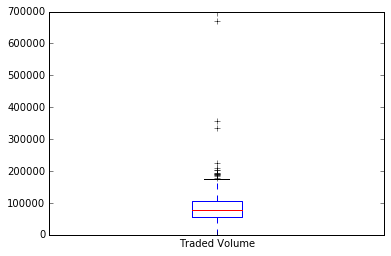

In [16]:
df_stock['Traded Volume'].plot(kind='box')